In [1]:
DATA_DIR = "/run/media/maciej/Nowy/data/json/"
OUTPUT_FILE = "results.txt"

In [33]:
import json
import os
from tqdm import tqdm


def run_on_files(func):
    file_idx = 0
    
    files = os.listdir(DATA_DIR)
    for file in tqdm(files):
        if file.startswith("judgment"):
        
            file_path = os.path.join(DATA_DIR, file)
            with open(file_path, 'r') as f:
                data = json.load(f)
                func(data)
            



In [139]:
def normalize(amount, pennies):
#     filtered_value = [character for character in amount if character not in ". "]
    if pennies is None:
        pennies = 0
        
    pattern = re.compile(r';|’|\.|\s+')
    filtered_value = re.sub(pattern, '', amount)
    joined_digits = "".join(filtered_value)
    return int(joined_digits) + float("0.{}".format(pennies))

In [140]:
POSSIBLE_MONEY_REGEX = r"\d[\d\.\s]*\s+zł.{3}"

ENDINGS = [
    "pt", # złptych
    "ot", # złotych
    "[^a-zA-Z]", # zł. zł, zł 
    "o-\s+tych", # zło-\ntych
]
JOINED_ENDINGS = "|".join(ending for ending in ENDINGS)

DETAILED_MONEY_REGEX = r"(?P<money>\d[;’\d\.\s]*)(\,\s*(?P<pennies>\d{2,}))?\s*zł(" + JOINED_ENDINGS + ")"
print(DETAILED_MONEY_REGEX)


(?P<money>\d[;’\d\.\s]*)(\,\s*(?P<pennies>\d{2,}))?\s*zł(pt|ot|[^a-zA-Z]|o-\s+tych)


In [142]:
import re

def money_search(data):
    judgments = [x["textContent"] for x in data["items"]]
    
    for judgment in judgments:                        
        data = judgment
        with open(OUTPUT_FILE, 'a') as f:        
            for match in re.finditer(DETAILED_MONEY_REGEX, data, re.DOTALL):
                amount, pennies = match.group('money', 'pennies')

                normalized = normalize(amount, pennies)
                if normalized > 10**14:
                    idx = match.start('money')
                    print(data[idx-20:idx+30])
                f.write("{}\n".format(normalized))


    
run_on_files(money_search)

 37%|███▋      | 1189/3192 [02:46<04:40,  7.14it/s]

k sprawy:  
PN-1/15/21 
 
 
16.03.2015 
5.840.448,
sprawy  
Szp/FZ -55/2014 
 
 
26.09.2014 
6.025.36
ńskiego  
Łódź 
 
 
16.12.2014 
2.119.600 zł 
wg k
w Poznaniu 
DZP/284/2014 
 
 
 
15.10.2014 
 
6.30
ono 
zamawiającemu 
27.04.2015 
22.415.782.59 zł 

 sprawy:  
PN-I/l 5/21 
 
 
16.03.2015 
6.017.432,
iegańskiego 
 Łódź 
16.12.2014 2.119.600 zł  
wg k
w Poznaniu 
DZP/284/2014 
15.10.2014 6.300.000 zł 
ono 
Zamawiającemu 
27.04.2015 
17.601.771,72 zł 



 44%|████▍     | 1400/3192 [03:15<04:09,  7.18it/s]

989-1262451, 1990 - 407930.09.1990983 zł.</p>
    


 61%|██████▏   | 1959/3192 [04:31<02:51,  7.20it/s]

a wynika z umowy nr 0023686010010410030 zł, w kwoc


 76%|███████▋  | 2438/3192 [05:38<01:44,  7.20it/s]

 z urzędu</a> (Dz.U.2002.163.1348; 1549,80 zł za p


 88%|████████▊ | 2817/3192 [06:33<00:52,  7.16it/s]

ego. 
 
Rok / dzień 01.01 30.06 31.12 
2015 3,466 


 94%|█████████▍| 3006/3192 [06:59<00:25,  7.17it/s]

rodki zablokowane - 9.999.999.999.999.99 zł”. Info


100%|██████████| 3192/3192 [07:25<00:00,  7.16it/s]


In [143]:
def load_amounts():
    with open(OUTPUT_FILE, 'r') as f:
        data = [float(amount) for amount in f.readlines()]
    return data

In [144]:
import matplotlib.pyplot as plt
import numpy as np



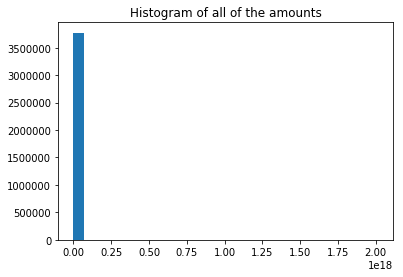

In [159]:
amounts = load_amounts()
plt.hist(amounts, bins=30)
plt.title("Histogram of all of the amounts")
plt.show()

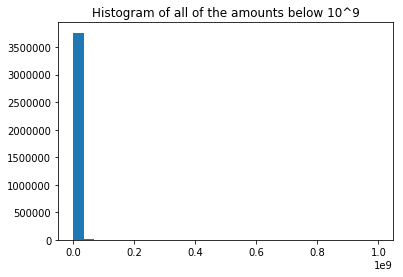

In [176]:
amounts = [amount for amount in load_amounts() if amount < 10**9]
plt.hist(amounts, bins=30)
plt.title("Histogram of all of the amounts below 10^9")
plt.show()

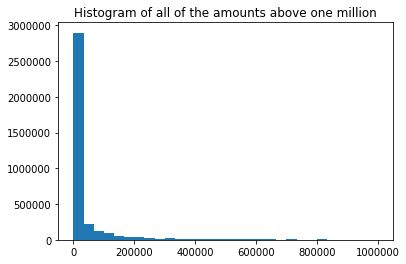

In [177]:
amounts = [amount for amount in load_amounts() if amount < 10**6]
plt.hist(amounts, bins=30)
plt.title("Histogram of all of the amounts above one million")
plt.show()

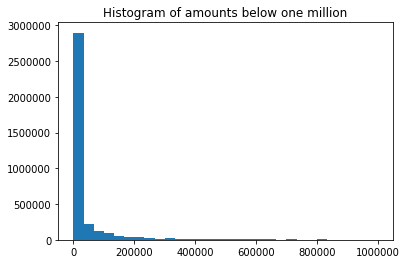

In [156]:
amounts = load_amounts()
below_million = [amount for amount in amounts if amount < 10**6]
plt.hist(below_million, bins=30)
plt.title("Histogram of amounts below one million")
plt.show()

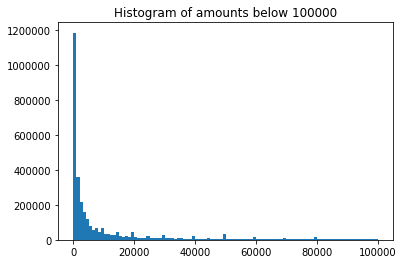

In [175]:
amounts = load_amounts()
below_million = [amount for amount in amounts if 10 < amount < 100000]
plt.hist(below_million, bins=100)
plt.title("Histogram of amounts below 100000")
plt.show()

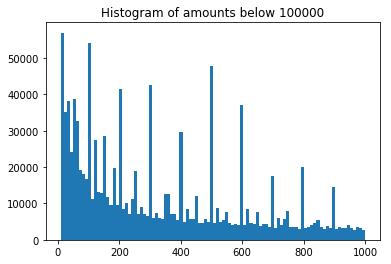

In [178]:
amounts = load_amounts()
below_million = [amount for amount in amounts if 10 < amount < 1000]
plt.hist(below_million, bins=100)
plt.title("Histogram of amounts below 100000")
plt.show()